In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:
# Import training data & testing data
cwd = os.getcwd()
train_data_import = pd.read_csv(cwd + "./banking_train.csv", sep=";")
test_data_import = pd.read_csv(cwd + "./banking_test.csv", sep=";")

# Create copies of the original data to manipulate
train_data = train_data_import.copy()
test_data = test_data_import.copy()

## Project Ideas:
### Sections(Campaign):
1. EDA - (Crosstabs, Visualizations, )
2. Modeling - ()
* Explore the data to identify which customers are most likely to default 
* Explore the data to identify which customers are most likely to take out loans
* PCA Analysis to reduce noise within the data.
* Cluster Analysis???


In [23]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Exploratory Data Analysis
* Explore missing values
* Descriptive Statistics
* Remove predictor variables with weak predictive power
* Examine the Dataframe
* Visualize & Eliminate Outliers
* Visualize the Distribution of Independent Variables vs Dependent Variables

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [25]:
# Descriptive statistics for the training data
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Rename Target Variable & Preview Dataframe

In [26]:
train_data = train_data.rename(columns={'y':'term_deposit'})
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Feature Engineering

### Numeric Variables:
#### Age
* Young_Adult: < 25
* Adult: 26 - 55
* Senior_Adult: > 55

In [27]:
train_data['age'].describe(percentiles=[.01, .05,.1,.25,.5,.75,.9,.95,.99])

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
1%          23.000000
5%          27.000000
10%         29.000000
25%         33.000000
50%         39.000000
75%         48.000000
90%         56.000000
95%         59.000000
99%         71.000000
max         95.000000
Name: age, dtype: float64

In [28]:
def age_conv(age):
    if age <= 25:
        return 'Young_Adult'
    elif age <= 55:
        return 'Adult'
    else:
        return 'Senior_Adult'

train_data['age_cat'] = train_data['age'].apply(age_conv)

print('Age Category Frequency Counts')
display(train_data['age_cat'].value_counts())
print('Age Category vs Default')
display(pd.crosstab(train_data['age_cat'], train_data['default'], normalize='index'))
print('Age Category vs Term Deposit')
display(pd.crosstab(train_data['age_cat'], train_data['term_deposit'], normalize='index'))

Age Category Frequency Counts


Adult           38975
Senior_Adult     4900
Young_Adult      1336
Name: age_cat, dtype: int64

Age Category vs Default


default,no,yes
age_cat,,
Adult,0.980911,0.019089
Senior_Adult,0.989388,0.010612
Young_Adult,0.985778,0.014222


Age Category vs Term Deposit


term_deposit,no,yes
age_cat,,
Adult,0.895754,0.104246
Senior_Adult,0.815102,0.184898
Young_Adult,0.760479,0.239521


### Balance: balance_cat
* Negative: < 0
* Positive: >= 0

In [29]:
train_data['balance'].describe(percentiles=[.01, .05,.1,.25,.5,.75,.9,.95,.99])

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
1%         -627.000000
5%         -172.000000
10%           0.000000
25%          72.000000
50%         448.000000
75%        1428.000000
90%        3574.000000
95%        5768.000000
99%       13164.900000
max      102127.000000
Name: balance, dtype: float64

In [30]:
train_data['balance_cat'] = train_data['balance'].apply(lambda x: 'Negative' if x < 0 else 'Positive')

display(train_data['balance_cat'].value_counts())

display(pd.crosstab(train_data['balance_cat'], train_data['default'], normalize='index'))
display(pd.crosstab(train_data['balance_cat'], train_data['term_deposit'], normalize='index'))

Positive    41445
Negative     3766
Name: balance_cat, dtype: int64

default,no,yes
balance_cat,,
Negative,0.883165,0.116835
Positive,0.990952,0.009048


term_deposit,no,yes
balance_cat,,
Negative,0.944238,0.055762
Positive,0.877452,0.122548


### Categorical Variables

In [31]:
train_data.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,term_deposit,age_cat,balance_cat
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,Senior_Adult,Positive
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,Adult,Positive
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,Adult,Positive
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,Adult,Positive
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,Adult,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes,Adult,Positive
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes,Senior_Adult,Positive
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes,Senior_Adult,Positive
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no,Senior_Adult,Positive


#### Job: job_cat
* blue-collar = (blue-collar, technician, services, housemaid)
* admin = (admin, management)
* unemployed/retired = (unemployed, retired, unknown)
* self-employed = (self-employed, entrepreneur) 
* student = (student)

In [32]:
def job_conv(job):
    b_collar = ['blue-collar', 'technician', 'services', 'housemaid']
    admin = ['admin.', 'management']
    unemploy = ['unemployed', 'retired', 'unknown']
    self_empl = ['self-employed', 'entrepreneur']
    student = ['student']

    if job in b_collar:
        return 'Blue_Collar'
    elif job in admin:
        return 'Administration'
    elif job in unemploy:
        return 'Unemployed/Retired'
    elif job in self_empl:
        return 'Self-Employed'
    elif job in student:
        return 'Student'
    else:
        'Invalid Category'


train_data['job_cat'] = train_data['job'].apply(job_conv)

display(train_data['job_cat'].value_counts())

display(pd.crosstab(train_data['job_cat'], train_data['default'], normalize='index'))

display(pd.crosstab(train_data['job_cat'], train_data['term_deposit'], normalize='index'))

Blue_Collar           22723
Administration        14629
Unemployed/Retired     3855
Self-Employed          3066
Student                 938
Name: job_cat, dtype: int64

default,no,yes
job_cat,,
Administration,0.983731,0.016269
Blue_Collar,0.981164,0.018836
Self-Employed,0.971298,0.028702
Student,0.996802,0.003198
Unemployed/Retired,0.984955,0.015045


term_deposit,no,yes
job_cat,,
Administration,0.867934,0.132066
Blue_Collar,0.910839,0.089161
Self-Employed,0.898891,0.101109
Student,0.713220,0.286780
Unemployed/Retired,0.804929,0.195071


### Credit Default Analysis: Crosstabs

In [33]:
display(train_data['default'].value_counts())
display(train_data['default'].value_counts(normalize=True))

no     44396
yes      815
Name: default, dtype: int64

no     0.981973
yes    0.018027
Name: default, dtype: float64

In [34]:
cat_vars = ['marital', 'education', 'housing', 'loan', 'balance_cat', 'age_cat', 'job_cat']

for var in cat_vars:
    print(f'{var.upper()} Frequency Table')
    display(train_data[var].value_counts())
    print(f'{var.upper()} vs Default Crosstab')
    display(pd.crosstab(train_data[var], train_data['default'], normalize='index'))
    print('')

MARITAL Frequency Table


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

MARITAL vs Default Crosstab


default,no,yes
marital,,
divorced,0.975418,0.024582
married,0.983538,0.016462
single,0.981314,0.018686



EDUCATION Frequency Table


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

EDUCATION vs Default Crosstab


default,no,yes
education,,
primary,0.981463,0.018537
secondary,0.980260,0.019740
tertiary,0.985114,0.014886
unknown,0.982768,0.017232



HOUSING Frequency Table


yes    25130
no     20081
Name: housing, dtype: int64

HOUSING vs Default Crosstab


default,no,yes
housing,,
no,0.981077,0.018923
yes,0.982690,0.017310



LOAN Frequency Table


no     37967
yes     7244
Name: loan, dtype: int64

LOAN vs Default Crosstab


default,no,yes
loan,,
no,0.986462,0.013538
yes,0.958448,0.041552



BALANCE_CAT Frequency Table


Positive    41445
Negative     3766
Name: balance_cat, dtype: int64

BALANCE_CAT vs Default Crosstab


default,no,yes
balance_cat,,
Negative,0.883165,0.116835
Positive,0.990952,0.009048



AGE_CAT Frequency Table


Adult           38975
Senior_Adult     4900
Young_Adult      1336
Name: age_cat, dtype: int64

AGE_CAT vs Default Crosstab


default,no,yes
age_cat,,
Adult,0.980911,0.019089
Senior_Adult,0.989388,0.010612
Young_Adult,0.985778,0.014222



JOB_CAT Frequency Table


Blue_Collar           22723
Administration        14629
Unemployed/Retired     3855
Self-Employed          3066
Student                 938
Name: job_cat, dtype: int64

JOB_CAT vs Default Crosstab


default,no,yes
job_cat,,
Administration,0.983731,0.016269
Blue_Collar,0.981164,0.018836
Self-Employed,0.971298,0.028702
Student,0.996802,0.003198
Unemployed/Retired,0.984955,0.015045


In [35]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,age_cat,balance_cat,job_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Senior_Adult,Positive,Administration
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Adult,Positive,Blue_Collar
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adult,Positive,Self-Employed
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Adult,Positive,Blue_Collar
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Adult,Positive,Unemployed/Retired


In [36]:
train_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit', 'age_cat', 'balance_cat',
       'job_cat'],
      dtype='object')

['marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'term_deposit', 'age_cat', 'balance_cat',
       'job_cat']

## Default Analysis: Logistic Regression

#### Marital Status vs Default

In [37]:
from statsmodels.formula.api import logit


train_data['Default'] = train_data['default'].apply(lambda x: 1 if x == 'yes' else 0)

model1d = logit(formula='Default ~ marital', data=train_data).fit()

model1d.summary()

Optimization terminated successfully.
         Current function value: 0.090084
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45208
Method:                           MLE   Df Model:                            2
Date:                Thu, 25 May 2023   Pseudo R-squ.:                0.001905
Time:                        23:18:12   Log-Likelihood:                -4072.8
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                 0.0004204
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.6808      0.089    -41.129      0.000      -3.856      -3.505
marital[T.married]    -0.4093      0.101     -4.037      0.000      -0.608      -0.211
marital[T.single]     -0.2803      0.111     -2.530      0.011      -0.497      -0.063
======================================================================================
"""

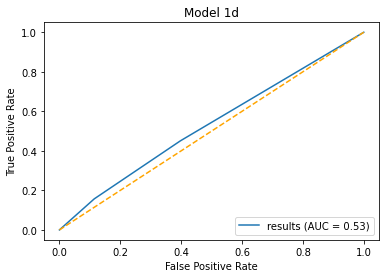

In [38]:
import matplotlib.pyplot as plt

# Import Metrics package
import sklearn.metrics as skm

# Make predictions for Model #1
train_data['pred_1d'] = model1d.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['Default'], train_data['pred_1d'])


# ROC Curve Plot Function
def plot_roc(fpr,tpr, title):
    
    # AUC score
    auc_score = skm.auc(fpr,tpr)
    
    # ROC curve
    skm.RocCurveDisplay(fpr=fpr, tpr=tpr,
                        roc_auc=auc_score,
                        estimator_name='results').plot()
    
    # Add title to ROC curve
    plt.title(title)
    
    # Add the diagonal line
    plt.plot([0, 1], [0, 1], 
             color='orange', 
             linestyle='--')

# Display ROC Curve w/ AUC Score: Model1d
plot_roc(fpr,tpr, title='Model 1d')

#### 

#### Job Category vs Default

In [39]:
model2d = logit(formula='Default ~ job_cat', data=train_data).fit()

model2d.summary()

Optimization terminated successfully.
         Current function value: 0.089815
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45206
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 May 2023   Pseudo R-squ.:                0.004892
Time:                        23:18:13   Log-Likelihood:                -4060.6
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                 4.488e-08
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.1021      0.065    -62.767      0.000      -4.230      -3.974
job_cat[T.Blue_Collar]            0.1491      0.082      1.828      0.068      -0.011       0.309
job_cat[T.Self-Employed]          0.5804      0.126      4.593      0.000       0.333       0.828
job_cat[T.Student]               -1.6398      0.582     -2.818      0.005      -2.780      -0.499
job_cat[T.Unemployed/Retired]    -0.0794      0.148     -0.538      0.590      -0.369       0.210
=================================================================================================
"""

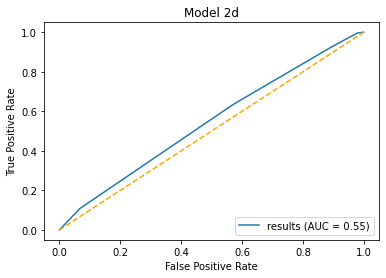

In [40]:
# Make predictions for Model #2d
train_data['pred_2d'] = model2d.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['Default'], train_data['pred_2d'])

# Display ROC Curve w/ AUC Score: Model1d
plot_roc(fpr,tpr, title='Model 2d')

#### Age Category vs Default

In [41]:
model3d = logit(formula='Default ~ age_cat', data=train_data).fit()

model3d.summary()

Optimization terminated successfully.
         Current function value: 0.090019
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45208
Method:                           MLE   Df Model:                            2
Date:                Thu, 25 May 2023   Pseudo R-squ.:                0.002628
Time:                        23:18:14   Log-Likelihood:                -4069.9
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                 2.201e-05
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.9394      0.037   -106.421      0.000      -4.012      -3.867
age_cat[T.Senior_Adult]    -0.5957      0.144     -4.130      0.000      -0.878      -0.313
age_cat[T.Young_Adult]     -0.2993      0.234     -1.279      0.201      -0.758       0.159
===========================================================================================
"""

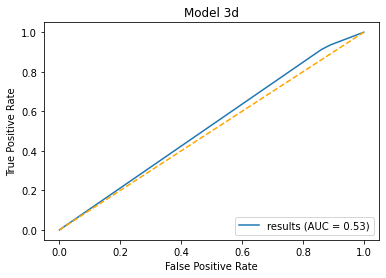

In [42]:
# Make predictions for Model #3d
train_data['pred_3d'] = model3d.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['Default'], train_data['pred_3d'])

# Display ROC Curve w/ AUC Score: Model3d
plot_roc(fpr,tpr, title='Model 3d')

#### Balance Category vs Default

In [43]:
model4d = logit(formula='Default ~ balance_cat', data=train_data).fit()

model4d.summary()

Optimization terminated successfully.
         Current function value: 0.077319
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.1433
Time:                        23:18:16   Log-Likelihood:                -3495.7
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                2.193e-256
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.0228      0.051    -39.874      0.000      -2.122      -1.923
balance_cat[T.Positive]    -2.6734      0.073    -36.845      0.000      -2.816      -2.531
===========================================================================================
"""

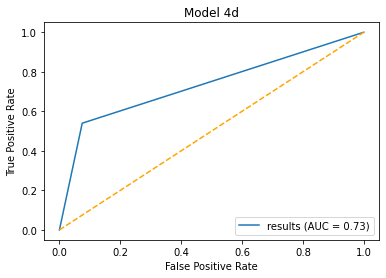

In [44]:
# Make predictions for Model #2d
train_data['pred_4d'] = model4d.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['Default'], train_data['pred_4d'])

# Display ROC Curve w/ AUC Score: Model1d
plot_roc(fpr,tpr, title='Model 4d')

#### Active Loan vs Default

In [45]:
model5d = logit(formula='Default ~ loan', data=train_data).fit()

model5d.summary()

Optimization terminated successfully.
         Current function value: 0.087898
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 May 2023   Pseudo R-squ.:                 0.02613
Time:                        23:18:17   Log-Likelihood:                -3973.9
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                 2.674e-48
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.2886      0.044    -96.569      0.000      -4.376      -4.202
loan[T.yes]     1.1502      0.074     15.597      0.000       1.006       1.295
===============================================================================
"""

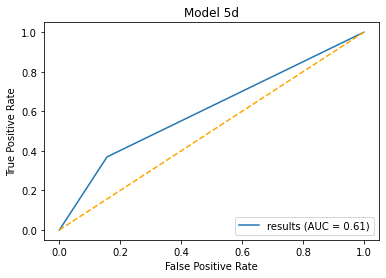

In [46]:
# Make predictions for Model #2d
train_data['pred_5d'] = model5d.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['Default'], train_data['pred_5d'])

# Display ROC Curve w/ AUC Score: Model1d
plot_roc(fpr,tpr, title='Model 5d')

#### Education vs Default

In [47]:
model6d = logit(formula='Default ~ education', data=train_data).fit()

model6d.summary()

Optimization terminated successfully.
         Current function value: 0.090126
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45207
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 May 2023   Pseudo R-squ.:                0.001443
Time:                        23:18:18   Log-Likelihood:                -4074.7
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                  0.008199
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.9693      0.090    -44.315      0.000      -4.145      -3.794
education[T.secondary]     0.0641      0.101      0.633      0.527      -0.134       0.262
education[T.tertiary]     -0.2231      0.115     -1.945      0.052      -0.448       0.002
education[T.unknown]      -0.0743      0.200     -0.373      0.709      -0.465       0.317
==========================================================================================
"""

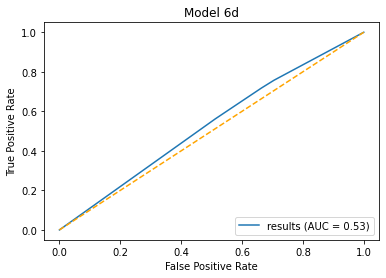

In [48]:
# Make predictions for Model #6d
train_data['pred_6d'] = model6d.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['Default'], train_data['pred_6d'])

# Display ROC Curve w/ AUC Score: Model6d
plot_roc(fpr,tpr, title='Model 6d')

In [49]:
model_cols = ['term_deposit', 'balance_cat', 'loan']

for col in model_cols:
    print(f'{col.upper()} vs Default Crosstab')
    display(pd.crosstab(train_data[col], train_data['Default'], normalize='index'))
    print('')

TERM_DEPOSIT vs Default Crosstab


Default,0,1
term_deposit,,
no,0.980888,0.019112
yes,0.990168,0.009832



BALANCE_CAT vs Default Crosstab


Default,0,1
balance_cat,,
Negative,0.883165,0.116835
Positive,0.990952,0.009048



LOAN vs Default Crosstab


Default,0,1
loan,,
no,0.986462,0.013538
yes,0.958448,0.041552


In [50]:
modelxd = logit(formula='Default ~ term_deposit + balance_cat + loan', data=train_data).fit()

modelxd.summary()

Optimization terminated successfully.
         Current function value: 0.076413
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45207
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.1534
Time:                        23:18:19   Log-Likelihood:                -3454.7
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                4.463e-271
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.2735      0.062    -36.625      0.000      -2.395      -2.152
term_deposit[T.yes]        -0.3154      0.147     -2.143      0.032      -0.604      -0.027
balance_cat[T.Positive]    -2.5273      0.074    -33.933      0.000      -2.673      -2.381
loan[T.yes]                 0.6990      0.078      8.982      0.000       0.546       0.852
===========================================================================================
"""

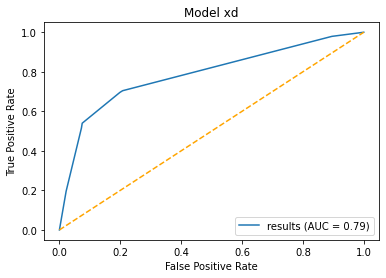

In [51]:
# Make predictions for Model #2d
train_data['pred_xd'] = modelxd.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['Default'], train_data['pred_xd'])

# Display ROC Curve w/ AUC Score: Model xd
plot_roc(fpr,tpr, title='Model xd')

In [52]:
modelxd2 = logit(formula='Default ~ term_deposit + balance_cat + loan + housing', data=train_data).fit()

modelxd2.summary()

Optimization terminated successfully.
         Current function value: 0.075978
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45206
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.1582
Time:                        23:18:20   Log-Likelihood:                -3435.0
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                2.820e-278
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.9398      0.080    -24.186      0.000      -2.097      -1.783
term_deposit[T.yes]        -0.3790      0.148     -2.568      0.010      -0.668      -0.090
balance_cat[T.Positive]    -2.6133      0.076    -34.168      0.000      -2.763      -2.463
loan[T.yes]                 0.6689      0.079      8.517      0.000       0.515       0.823
housing[T.yes]             -0.4725      0.075     -6.308      0.000      -0.619      -0.326
===========================================================================================
"""

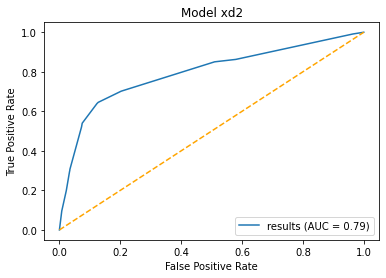

In [53]:
# Make predictions for Model xd2
train_data['pred_xd2'] = modelxd2.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['Default'], train_data['pred_xd2'])

# Display ROC Curve w/ AUC Score: Model xd2
plot_roc(fpr,tpr, title='Model xd2')

In [69]:
modelxd3 = logit(formula='Default ~ C(balance_cat) + C(loan) + C(housing)', data=train_data).fit()

modelxd3.summary()

Optimization terminated successfully.
         Current function value: 0.076058
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45207
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.1573
Time:                        13:16:28   Log-Likelihood:                -3438.7
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                4.726e-278
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.9719      0.080    -24.757      0.000      -2.128      -1.816
C(balance_cat)[T.Positive]    -2.6304      0.076    -34.410      0.000      -2.780      -2.481
C(loan)[T.yes]                 0.6776      0.079      8.624      0.000       0.524       0.832
C(housing)[T.yes]             -0.4577      0.075     -6.120      0.000      -0.604      -0.311
==============================================================================================
"""

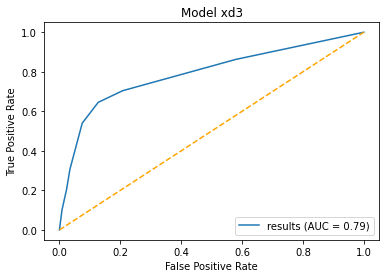

In [70]:
# Make predictions for Model xd3
train_data['pred_xd3'] = modelxd3.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['Default'], train_data['pred_xd3'])

# Display ROC Curve w/ AUC Score: Model xd3
plot_roc(fpr,tpr, title='Model xd3')

### Add Numeric Variables to the best performing Model
1: Balance

In [73]:
modelxd4 = logit(formula='Default ~ balance_cat + loan + housing + balance', data=train_data).fit()

modelxd4.summary()

Optimization terminated successfully.
         Current function value: 0.072277
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45206
Method:                           MLE   Df Model:                            4
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.1992
Time:                        13:20:07   Log-Likelihood:                -3267.7
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.3168      0.087    -26.715      0.000      -2.487      -2.147
balance_cat[T.Positive]    -1.5139      0.099    -15.295      0.000      -1.708      -1.320
loan[T.yes]                 0.5454      0.080      6.856      0.000       0.389       0.701
housing[T.yes]             -0.5528      0.076     -7.253      0.000      -0.702      -0.403
balance                    -0.0013   9.06e-05    -13.893      0.000      -0.001      -0.001
===========================================================================================
"""

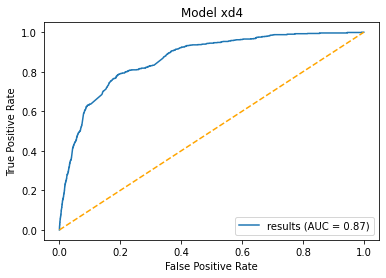

In [74]:
# Make predictions for Model xd3
train_data['pred_xd4'] = modelxd4.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['Default'], train_data['pred_xd4'])

# Display ROC Curve w/ AUC Score: Model xd3
plot_roc(fpr,tpr, title='Model xd4')

2. Age

In [75]:
modelxd5 = logit(formula='Default ~ balance_cat + loan + housing + age', data=train_data).fit()

modelxd5.summary()

Optimization terminated successfully.
         Current function value: 0.075948
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45206
Method:                           MLE   Df Model:                            4
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.1585
Time:                        13:28:24   Log-Likelihood:                -3433.7
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                7.304e-279
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.4850      0.173     -8.579      0.000      -1.824      -1.146
balance_cat[T.Positive]    -2.6217      0.076    -34.292      0.000      -2.772      -2.472
loan[T.yes]                 0.6788      0.079      8.637      0.000       0.525       0.833
housing[T.yes]             -0.4956      0.076     -6.550      0.000      -0.644      -0.347
age                        -0.0118      0.004     -3.130      0.002      -0.019      -0.004
===========================================================================================
"""

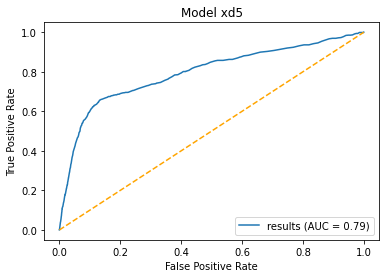

In [76]:
# Make predictions for Model xd5
train_data['pred_xd5'] = modelxd5.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['Default'], train_data['pred_xd5'])

# Display ROC Curve w/ AUC Score: Model xd5
plot_roc(fpr,tpr, title='Model xd5')

In [58]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,Default,pred_1d,pred_2d,pred_3d,pred_4d,pred_5d,pred_6d,pred_xd,pred_xd2,pred_xd3
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0.016462,0.016269,0.010612,0.009048,0.013538,0.014886,0.008156,0.006524,0.006305
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0.018686,0.018836,0.019089,0.009048,0.013538,0.019740,0.008156,0.006524,0.006305
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0.016462,0.028702,0.019089,0.009048,0.041552,0.019740,0.016274,0.012658,0.012340
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0.016462,0.018836,0.019089,0.009048,0.013538,0.017232,0.008156,0.006524,0.006305
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0.018686,0.015045,0.019089,0.009048,0.013538,0.017232,0.008156,0.010424,0.009929


## Analyze Members with Negative Bank Account Balances

In [68]:
cat_vars

for var in cat_vars:
        if var != 'balance_cat':
                print(f'{var.upper()} vs Balance Category')
                display(pd.crosstab(train_data[var], train_data['balance_cat'], normalize='index'))
                print('')

MARITAL vs Balance Category


balance_cat,Negative,Positive
marital,,
divorced,0.110620,0.889380
married,0.080914,0.919086
single,0.077248,0.922752



EDUCATION vs Balance Category


balance_cat,Negative,Positive
education,,
primary,0.088600,0.911400
secondary,0.099603,0.900397
tertiary,0.054131,0.945869
unknown,0.068928,0.931072



HOUSING vs Balance Category


balance_cat,Negative,Positive
housing,,
no,0.051193,0.948807
yes,0.108953,0.891047



LOAN vs Balance Category


balance_cat,Negative,Positive
loan,,
no,0.067322,0.932678
yes,0.167035,0.832965



AGE_CAT vs Balance Category


balance_cat,Negative,Positive
age_cat,,
Adult,0.088262,0.911738
Senior_Adult,0.043673,0.956327
Young_Adult,0.083832,0.916168



JOB_CAT vs Balance Category


balance_cat,Negative,Positive
job_cat,,
Administration,0.072254,0.927746
Blue_Collar,0.100999,0.899001
Self-Employed,0.065558,0.934442
Student,0.012793,0.987207
Unemployed/Retired,0.052140,0.947860
